# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [14]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from t2_constants import *
from t2_utility import *

In [15]:
with open(f'{PICKLE_FOLDER}{CLUST_DF}.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{CLUST_DF}.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [16]:
clustering_df_array, clustering_df = scale_df(clustering_df, 1)
pure_clustering_df_array, pure_clustering_df = scale_df(pure_clustering_df, 1)

In [17]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## Hierarchical

#### Link methods
- complete: equivalent to Farthest Point Algorithm
- single: equivalent to Nearest Point Algorithm
- average: metric is average of distances of all pairs of points in the two clusters
- centroid: metric is distance between centroids

In [18]:
methods = ['complete', 'single', 'average', 'centroid']
best_n_clusters = 10

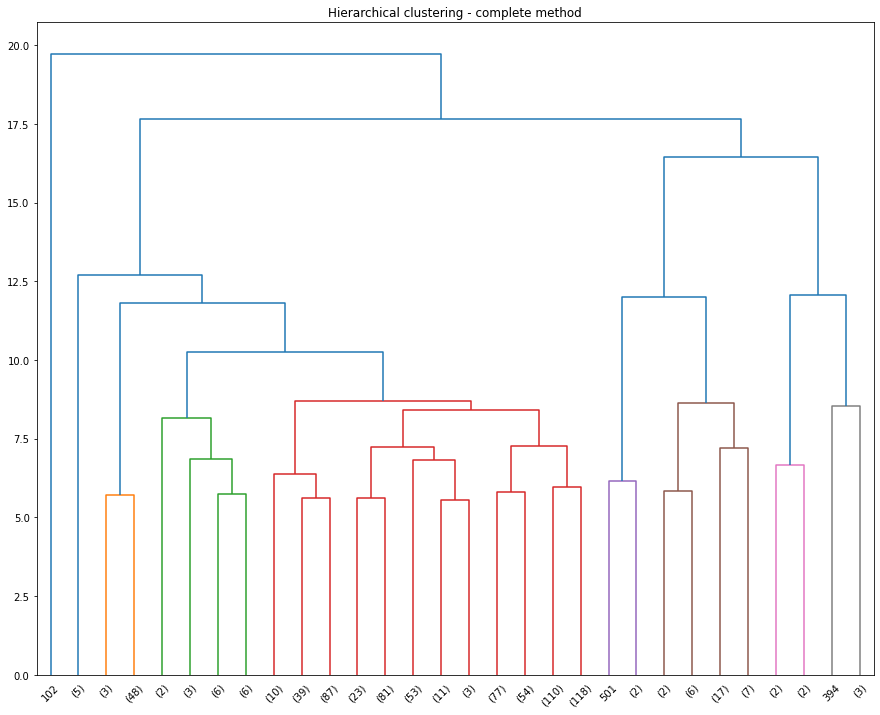

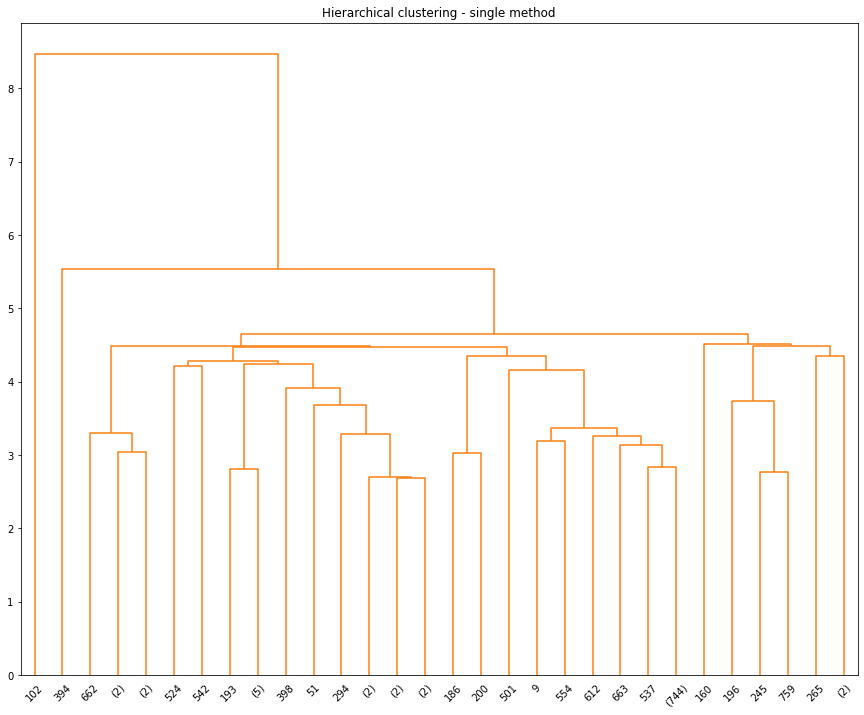

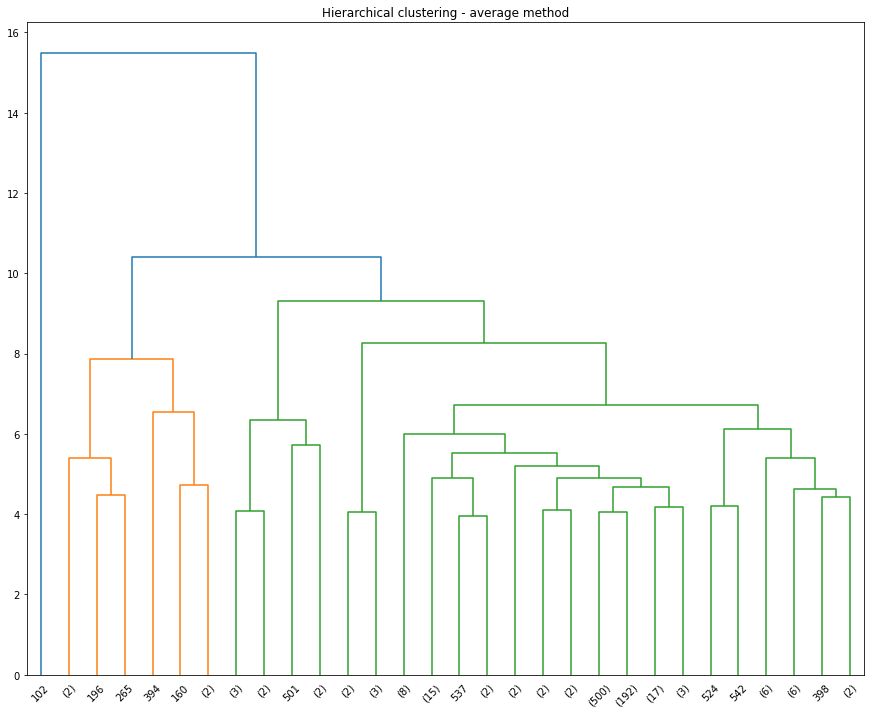

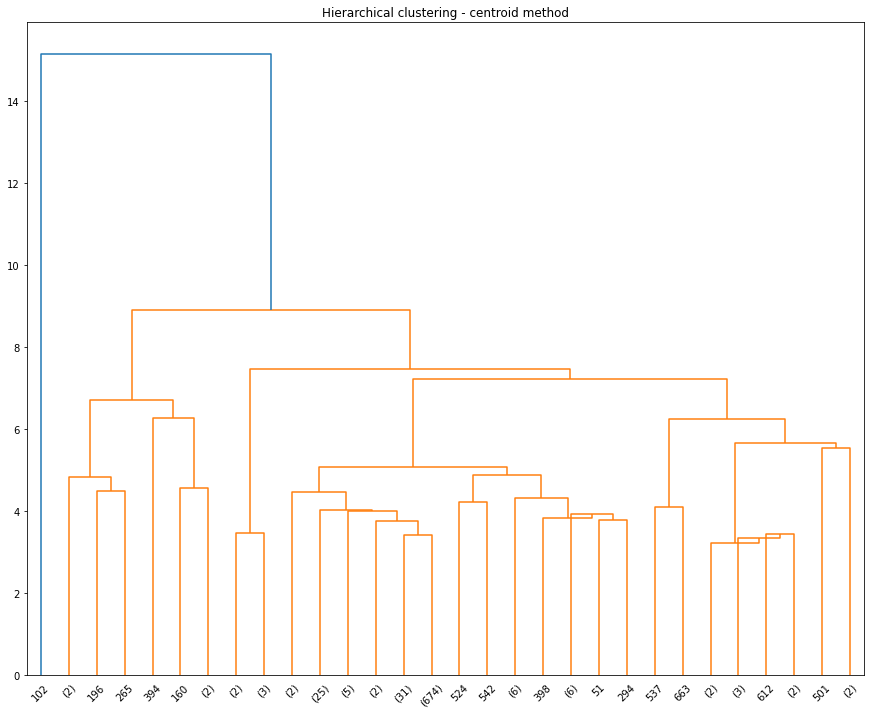

In [19]:
data_link_list = []
for method in methods:
    data_link_list.append(hierarchical_clustering(clustering_df_array, method, best_n_clusters, clustering_scores_df))

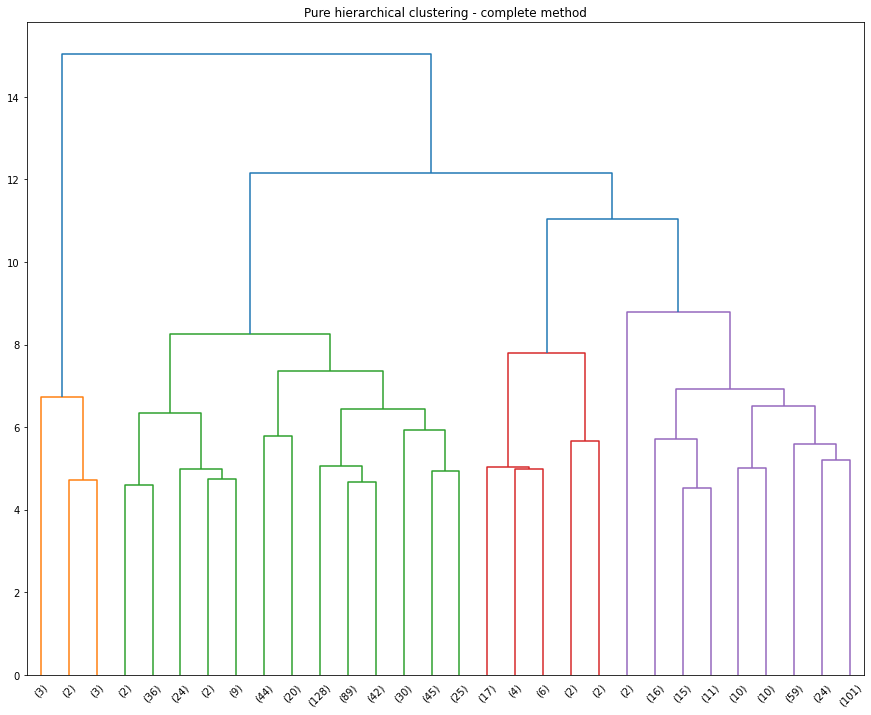

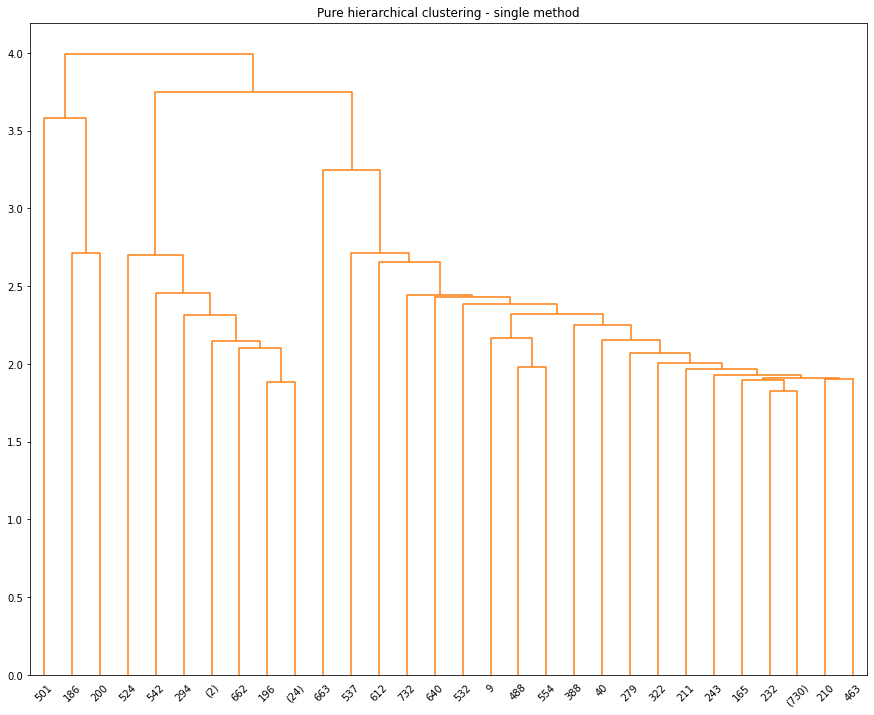

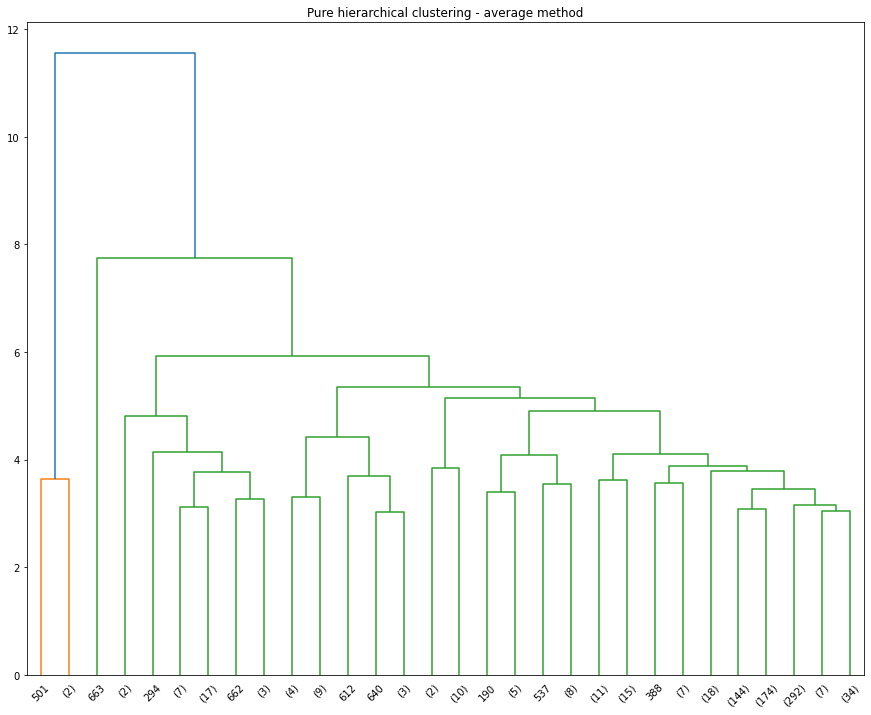

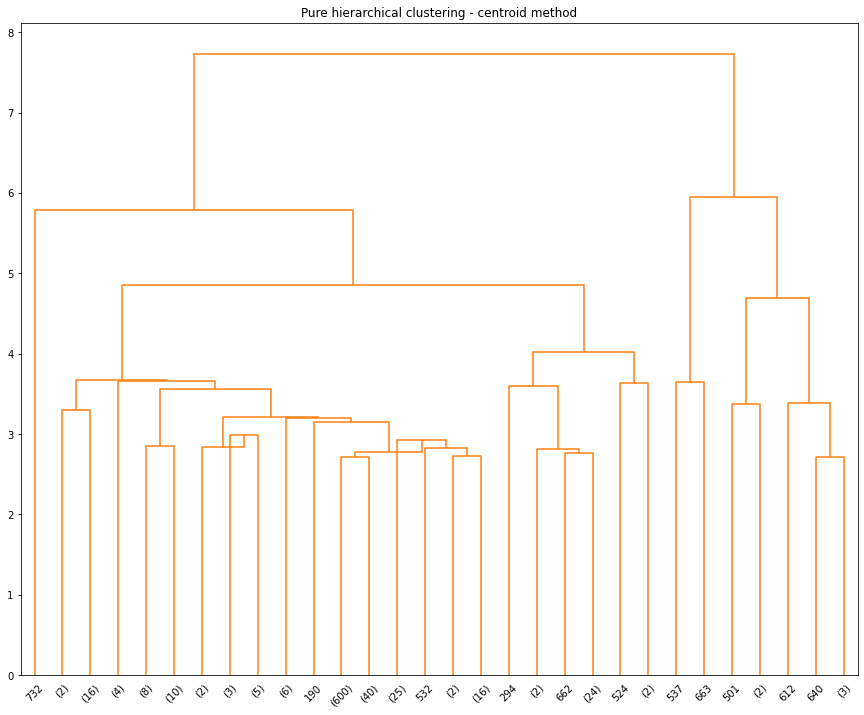

In [20]:
pure_data_link_list = []
for method in methods:
    pure_data_link_list.append(hierarchical_clustering(pure_clustering_df_array, method, best_n_clusters, clustering_scores_df, pure=1))

In [21]:
clustering_scores_df

,silhouette,SSE
hierarchical_complete,0.056451,5089.372586
hierarchical_single,0.419537,6617.210350
hierarchical_average,0.403280,6273.490446
hierarchical_centroid,-2.000000,8613.000000
pure_hierarchical_complete,0.102824,3149.885256
pure_hierarchical_single,0.390362,4963.554313
pure_hierarchical_average,0.183967,4266.370118
pure_hierarchical_centroid,0.333144,6124.949311


We plot only the cluster analysis of the complete method, because the others do not achieve great scores

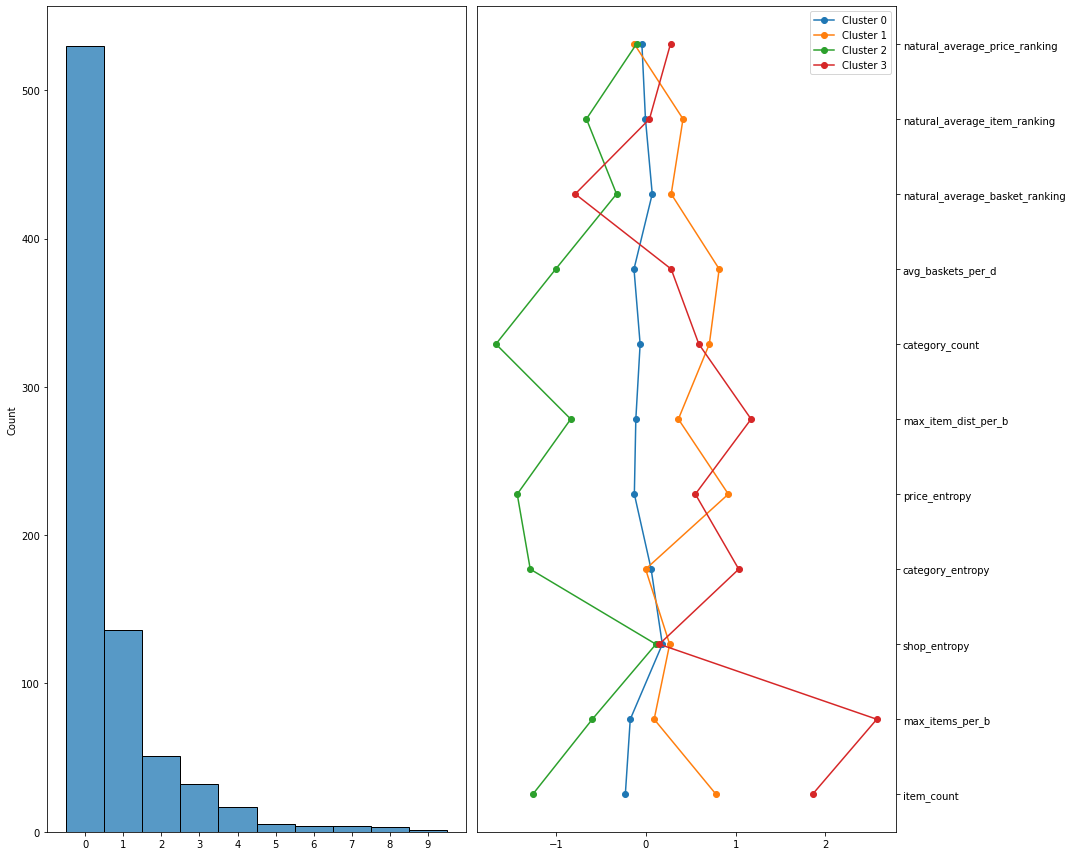

In [22]:
l = show_clusters(data_link_list[0], clustering_df_array, clustering_df, best_n_clusters)
u_df[LAB] = l
clustering_df[LAB] = l

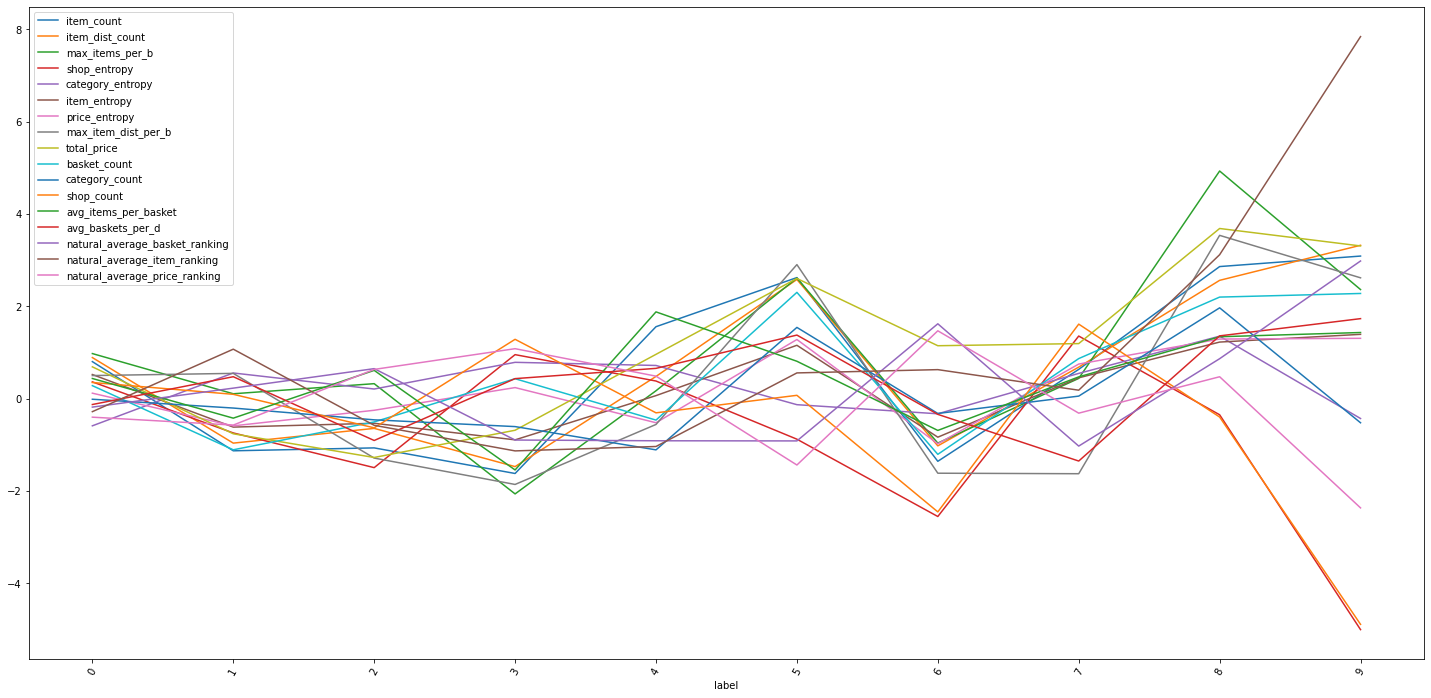

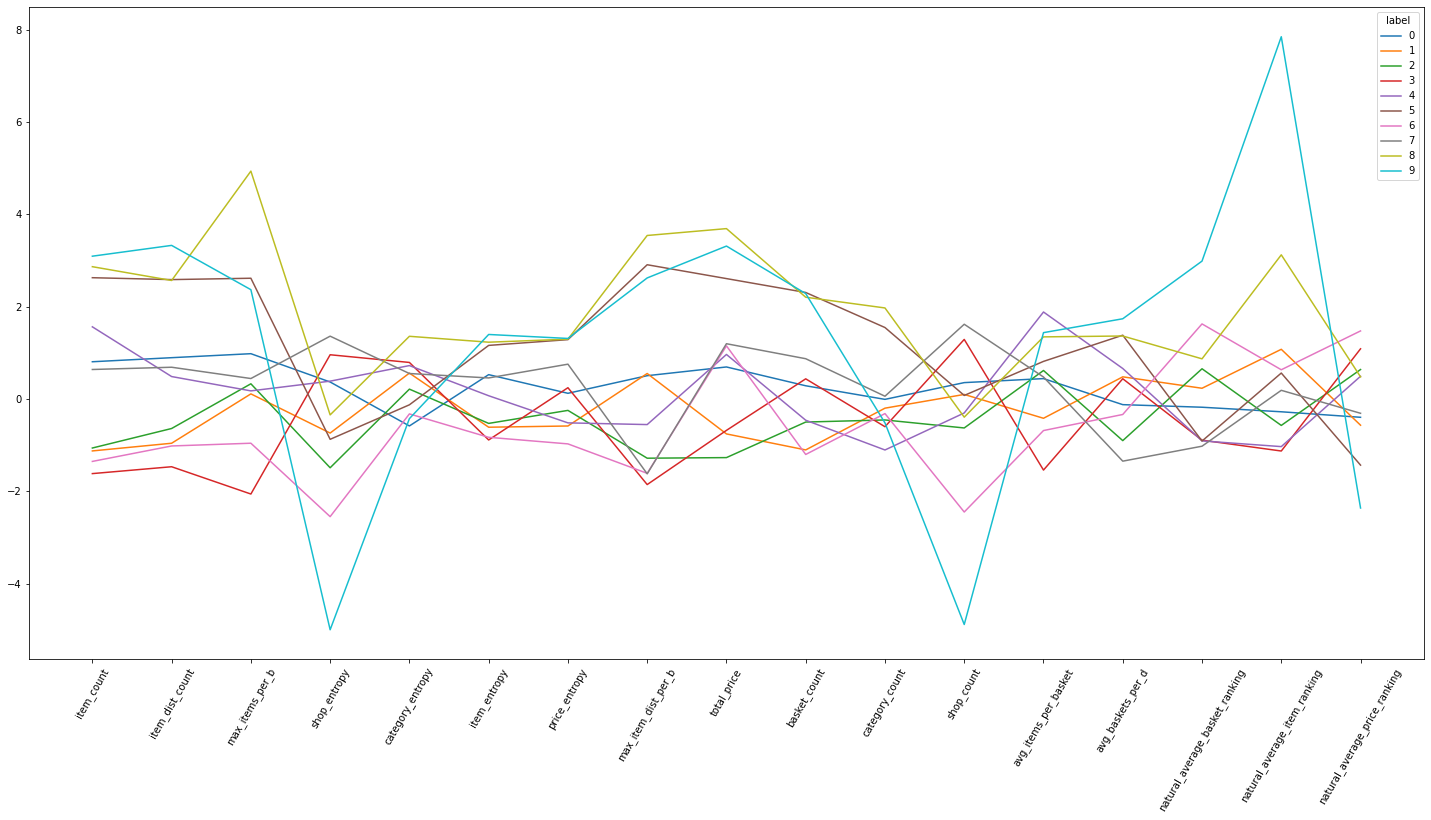

In [23]:
plot_expansion(u_df)

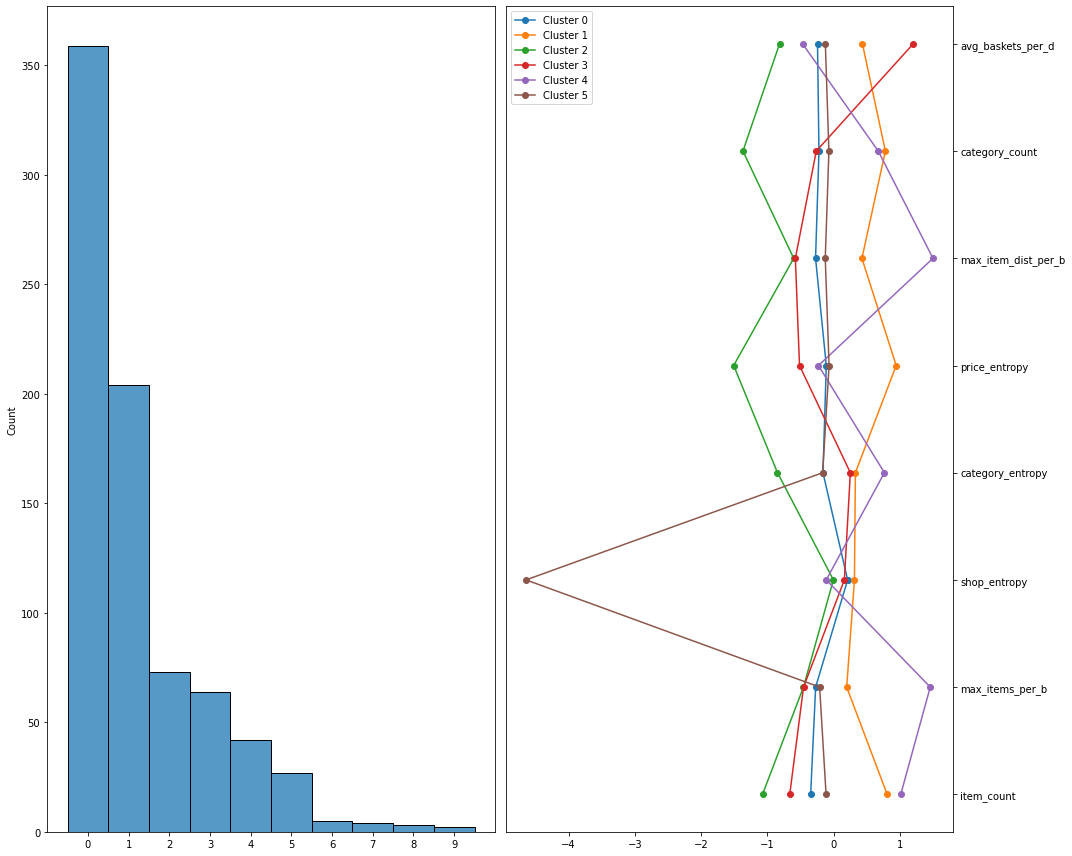

In [24]:
pl = show_clusters(pure_data_link_list[0], pure_clustering_df_array, pure_clustering_df, best_n_clusters)
pure_u_df[LAB] = pl
pure_clustering_df[LAB] = pl

<AxesSubplot:xlabel='label', ylabel='item_count'>

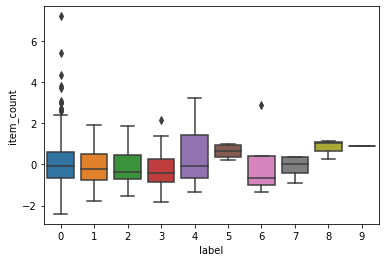

In [25]:
sns.boxplot(x=LAB, y=ICNT, data=clustering_df)

<AxesSubplot:xlabel='label', ylabel='price_entropy'>

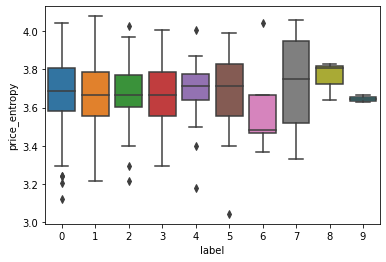

In [26]:
sns.boxplot(x=LAB, y=PE, data=pure_u_df)